<a href="https://colab.research.google.com/github/dibab64/deeplearning-dibab/blob/main/romancoinclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras

In [3]:
import os


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
datapath = '/content/drive/MyDrive/Colab Notebooks/dataset/RRC-60'

In [6]:
os.listdir(datapath + '/Observe')

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '24',
 '26',
 '27',
 '28',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '54',
 '55',
 '56',
 '57',
 '60',
 '11',
 '58',
 '59',
 '53',
 '23',
 '25',
 '29',
 '.DS_Store']

In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
train = tf.keras.utils.image_dataset_from_directory(
    directory=datapath + '/Observe',
    validation_split=0.2,
    subset='training',
    seed=123,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True
)

Found 6000 files belonging to 60 classes.
Using 4800 files for training.


In [9]:
val = tf.keras.utils.image_dataset_from_directory(
    directory=datapath + '/Observe',
    labels='inferred',
    validation_split=0.2,
    seed=123,
    subset='validation',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    #prefetch_size=100
)

Found 6000 files belonging to 60 classes.
Using 1200 files for validation.


In [10]:
class_names = train.class_names
class_names

['1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '7',
 '8',
 '9']

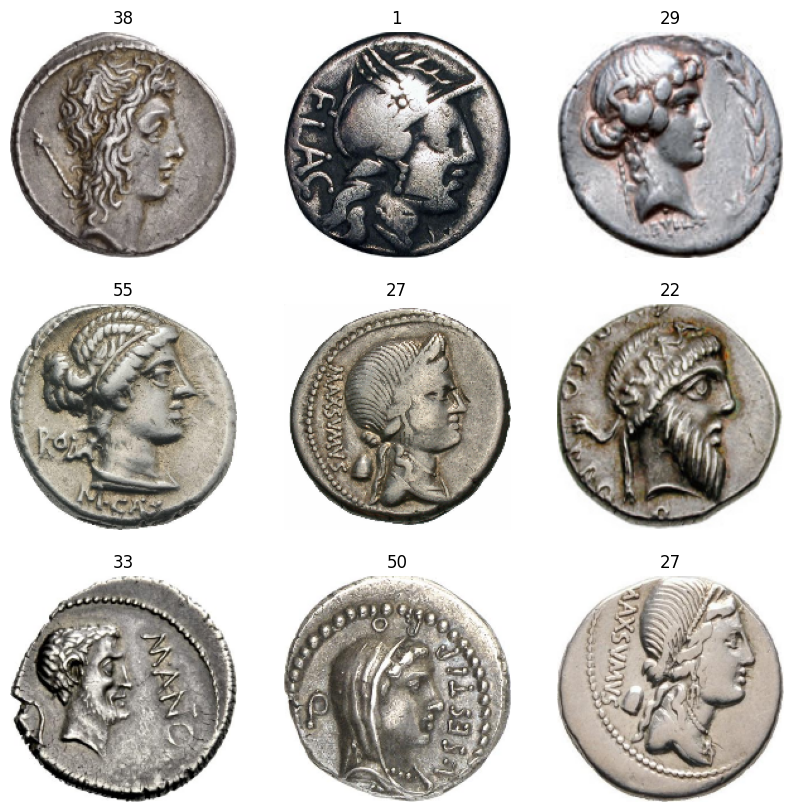

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
!pip install keras_cv
import keras_cv
from keras_cv import bounding_box
from keras_cv import visualization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.9/601.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 12.6 MB/s eta 0:00:00
Using TensorFlow backend


In [13]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights='imagenet')

21834768/21834768 [==============================] - 0s 0us/step


In [27]:
train_dataset = train.prefetch(tf.data.AUTOTUNE)


SyntaxError: ignored

In [24]:
val_dataset = val.prefetch(tf.data.AUTOTUNE)


In [14]:
from keras import layers
from keras.applications import EfficientNetB0

In [30]:
model = EfficientNetB0(

    include_top=True,
    weights=None,
    classes=len(class_names),
    input_shape=(img_height,img_width, 3),
)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 rescaling_4 (Rescaling)     (None, 180, 180, 3)          0         ['input_4[0][0]']             
                                                                                                  
 normalization_3 (Normaliza  (None, 180, 180, 3)          7         ['rescaling_4[0][0]']         
 tion)                                                                                            
                                                                                                  
 stem_conv_pad (ZeroPadding  (None, 181, 181, 3)          0         ['normalization_3

In [31]:
epochs = 40
hist = model.fit(train, epochs=epochs, validation_data=val)

Epoch 1/40
150/150 [==============================] - 204s 1s/step - loss: 4.5569 - accuracy: 0.0252 - val_loss: 4.1457 - val_accuracy: 0.0175
Epoch 2/40
150/150 [==============================] - 29s 186ms/step - loss: 3.8921 - accuracy: 0.0613 - val_loss: 5.0198 - val_accuracy: 0.0175
Epoch 3/40
150/150 [==============================] - 29s 184ms/step - loss: 2.9383 - accuracy: 0.2131 - val_loss: 3.0352 - val_accuracy: 0.2258
Epoch 4/40
150/150 [==============================] - 29s 190ms/step - loss: 1.8557 - accuracy: 0.4727 - val_loss: 2.0286 - val_accuracy: 0.4750
Epoch 5/40
150/150 [==============================] - 28s 177ms/step - loss: 1.1407 - accuracy: 0.6675 - val_loss: 5.0568 - val_accuracy: 0.2233
Epoch 6/40
150/150 [==============================] - 29s 190ms/step - loss: 0.6259 - accuracy: 0.8163 - val_loss: 1.0613 - val_accuracy: 0.7267
Epoch 7/40
150/150 [==============================] - 27s 174ms/step - loss: 0.3706 - accuracy: 0.8854 - val_loss: 1.0926 - val_accu

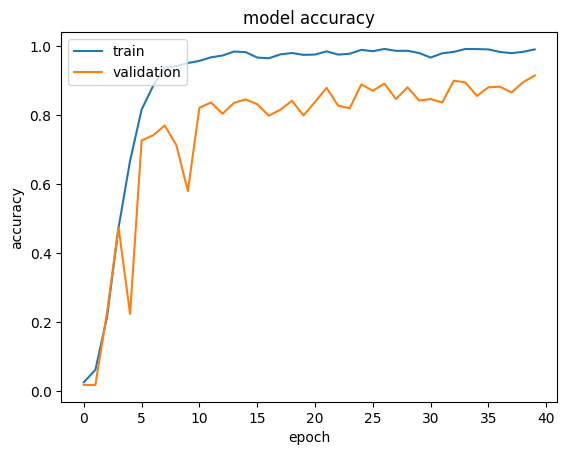

In [32]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

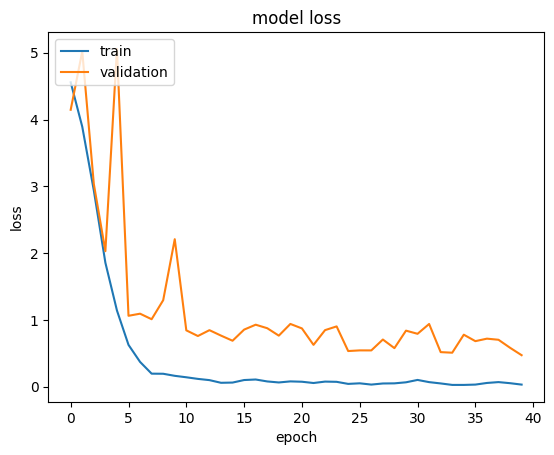

In [33]:
# prompt: loss grafiği

plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()
